## Some standard experiments

In [25]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

pybamm.set_logging_level("NOTICE")

## CCCV

In [26]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
    "Rest for 1 hour",
    "Charge at 1C until 4.2V",
    "Hold at 4.2V until C/50"),
])
model = pybamm.lithium_ion.SPMe()
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2021-09-28 16:16:46,738 - [NOTICE] simulation.solve(784): Cycle 1/1 (26.693 ms elapsed) --------------------
2021-09-28 16:16:46,739 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/4: Discharge at 1C until 2.5V
2021-09-28 16:16:46,859 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/4: Rest for 1 hour
2021-09-28 16:16:46,929 - [NOTICE] simulation.solve(818): Cycle 1/1, step 3/4: Charge at 1C until 4.2V
2021-09-28 16:16:47,003 - [NOTICE] simulation.solve(818): Cycle 1/1, step 4/4: Hold at 4.2V until C/50
2021-09-28 16:16:47,836 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 1.125 s


interactive(children=(FloatSlider(value=0.0, description='t', max=3.911842513594913, step=0.039118425135949125…

In [27]:
experiment = pybamm.Experiment([
    ("Discharge at 1C until 2.5V",
    "Rest for 1 hour",
    "Charge at 1C until 4.2V",
    "Hold at 4.2V until C/50")]*2)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2021-09-28 16:16:50,196 - [NOTICE] simulation.solve(784): Cycle 1/2 (26.290 ms elapsed) --------------------
2021-09-28 16:16:50,197 - [NOTICE] simulation.solve(818): Cycle 1/2, step 1/4: Discharge at 1C until 2.5V
2021-09-28 16:16:50,293 - [NOTICE] simulation.solve(818): Cycle 1/2, step 2/4: Rest for 1 hour
2021-09-28 16:16:50,362 - [NOTICE] simulation.solve(818): Cycle 1/2, step 3/4: Charge at 1C until 4.2V
2021-09-28 16:16:50,444 - [NOTICE] simulation.solve(818): Cycle 1/2, step 4/4: Hold at 4.2V until C/50
2021-09-28 16:16:50,918 - [NOTICE] simulation.solve(784): Cycle 2/2 (747.991 ms elapsed) --------------------
2021-09-28 16:16:50,919 - [NOTICE] simulation.solve(818): Cycle 2/2, step 1/4: Discharge at 1C until 2.5V
2021-09-28 16:16:50,994 - [NOTICE] simulation.solve(818): Cycle 2/2, step 2/4: Rest for 1 hour
2021-09-28 16:16:51,052 - [NOTICE] simulation.solve(818): Cycle 2/2, step 3/4: Charge at 1C until 4.2V
2021-09-28 16:16:51,099 - [NOTICE] simulation.solve(818): Cycle 2/2, s

interactive(children=(FloatSlider(value=0.0, description='t', max=7.828247110527843, step=0.07828247110527843)…

Interacting with the solution of an experiment

In [29]:
sim.solution.cycles[1].plot(["Terminal voltage [V]", "Current [A]"])

interactive(children=(FloatSlider(value=3.911842513594913, description='t', max=7.828247110527843, min=3.91184…

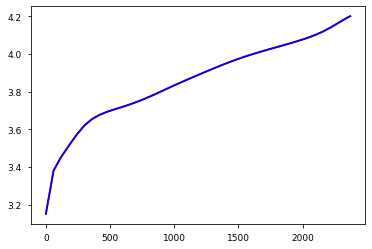

In [30]:
sol = sim.solution
fig, ax = plt.subplots()
for cycle in sol.cycles:
    t = cycle.steps[2]["Time [s]"].data
    V = cycle.steps[2]["Terminal voltage [V]"].data
    ax.plot(t-t[0],V)

## Constant power

In [32]:
parameter_values["Nominal cell capacity [A.h]"]

5.0

In [10]:
experiment = pybamm.Experiment([
    ("Discharge at 5A until 2.5V",
    "Charge at 15W until 4.2V",
    "Hold at 4.2V until 0.01A")
])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Current [A]", "Terminal power [W]", "Terminal voltage [V]"])

2021-09-28 15:53:46,137 - [NOTICE] simulation.solve(784): Cycle 1/1 (27.144 ms elapsed) --------------------
2021-09-28 15:53:46,137 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/3: Discharge at 5A until 2.5V
2021-09-28 15:53:46,246 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/3: Charge at 15W until 4.2V
2021-09-28 15:53:46,598 - [NOTICE] simulation.solve(818): Cycle 1/1, step 3/3: Hold at 4.2V until 0.01A
2021-09-28 15:53:47,481 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 1.372 s


interactive(children=(FloatSlider(value=0.0, description='t', max=3.807579317014924, step=0.03807579317014924)…

## Pulse charging

In [20]:
cycle = ["Discharge at 5A until 2.5V"] + [
    "Charge at 2C for 1 minute (1 second period)",
    "Rest for 5 minutes (10 second period)"] * 4 + [
    "Charge at 15W until 4.2V",
    "Hold at 4.2V until 0.01A"]
experiment = pybamm.Experiment([
    tuple(cycle)
])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Current [A]", "Terminal power [W]", "Terminal voltage [V]"])

2021-09-28 16:01:18,250 - [NOTICE] simulation.solve(784): Cycle 1/1 (27.309 ms elapsed) --------------------
2021-09-28 16:01:18,251 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/11: Discharge at 5A until 2.5V
2021-09-28 16:01:18,357 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/11: Charge at 2C for 1 minute (1 second period)
2021-09-28 16:01:18,407 - [NOTICE] simulation.solve(818): Cycle 1/1, step 3/11: Rest for 5 minutes (10 second period)
2021-09-28 16:01:18,448 - [NOTICE] simulation.solve(818): Cycle 1/1, step 4/11: Charge at 2C for 1 minute (1 second period)
2021-09-28 16:01:18,455 - [NOTICE] simulation.solve(818): Cycle 1/1, step 5/11: Rest for 5 minutes (10 second period)
2021-09-28 16:01:18,467 - [NOTICE] simulation.solve(818): Cycle 1/1, step 6/11: Charge at 2C for 1 minute (1 second period)
2021-09-28 16:01:18,475 - [NOTICE] simulation.solve(818): Cycle 1/1, step 7/11: Rest for 5 minutes (10 second period)
2021-09-28 16:01:18,489 - [NOTICE] simulation.solve(818): 

interactive(children=(FloatSlider(value=0.0, description='t', max=4.052087670443943, step=0.040520876704439435…

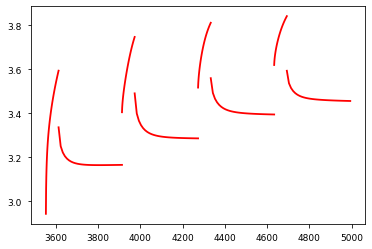

In [21]:
sol = sim.solution
for i in range(1,9):
    step = sol.cycles[0].steps[i]
    plt.plot(step["Time [s]"].data, step["Terminal voltage [V]"].data, "r-")

In [23]:
sol = sim.solution
pulses = sol.cycles[0].steps[1]
for i in range(2,9):
    pulses += sol.cycles[0].steps[i]
pulses.plot(["Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.9870997412344541, description='t', max=1.3870997412344537, min=0.987…

## GITT

In [33]:
cycle = [
    "Discharge at C/20 for 1 hour",
    "Rest for 1 hour",
] * 20
experiment = pybamm.Experiment([tuple(cycle)])
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]", "Current [A]"])

2021-09-28 16:17:47,386 - [NOTICE] simulation.solve(784): Cycle 1/1 (25.963 ms elapsed) --------------------
2021-09-28 16:17:47,386 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/40: Discharge at C/20 for 1 hour
2021-09-28 16:17:47,470 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/40: Rest for 1 hour
2021-09-28 16:17:47,544 - [NOTICE] simulation.solve(818): Cycle 1/1, step 3/40: Discharge at C/20 for 1 hour
2021-09-28 16:17:47,593 - [NOTICE] simulation.solve(818): Cycle 1/1, step 4/40: Rest for 1 hour
2021-09-28 16:17:47,638 - [NOTICE] simulation.solve(818): Cycle 1/1, step 5/40: Discharge at C/20 for 1 hour
2021-09-28 16:17:47,691 - [NOTICE] simulation.solve(818): Cycle 1/1, step 6/40: Rest for 1 hour
2021-09-28 16:17:47,735 - [NOTICE] simulation.solve(818): Cycle 1/1, step 7/40: Discharge at C/20 for 1 hour
2021-09-28 16:17:47,782 - [NOTICE] simulation.solve(818): Cycle 1/1, step 8/40: Rest for 1 hour
2021-09-28 16:17:47,827 - [NOTICE] simulation.solve(818): Cycle 1/1, st

interactive(children=(FloatSlider(value=0.0, description='t', max=40.000000000000014, step=0.40000000000000013…

OCV measurements

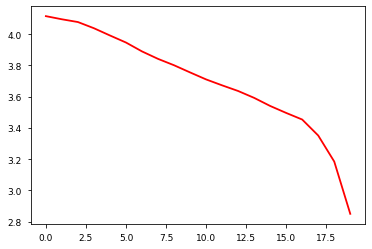

In [34]:
sol = sim.solution

def extract_ocv(step):
    return step["Terminal voltage [V]"].data[-1]

ocvs = [extract_ocv(step) for i,step in enumerate(sol.cycles[0].steps) if i%2==1]
plt.plot(np.arange(20),ocvs)

Resistance measurements

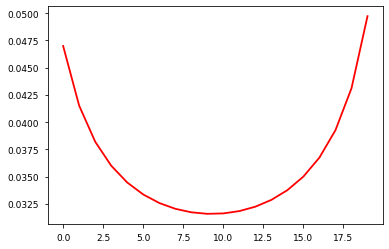

In [35]:
def extract_resistance(step):
    return step["Local ECM resistance [Ohm]"].data[0]

Rs = [extract_resistance(step) for i,step in enumerate(sol.cycles[0].steps) if i%2==0]
plt.plot(np.arange(20),Rs)

## Initial SOC

In [36]:
experiment = pybamm.Experiment([("Charge at 1C until 4.2V", "Hold at 4.2V until C/50")])
sols = []
init_socs = [0,0.2,0.4,0.6,0.8]
for initial_soc in init_socs:
  sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
  sol = sim.solve(initial_soc=initial_soc)
  sols.append(sol)

pybamm.dynamic_plot(sols,labels=[f"initial soc = {x}" for x in init_socs])

2021-09-28 16:18:19,546 - [NOTICE] simulation.solve(784): Cycle 1/1 (25.863 ms elapsed) --------------------
2021-09-28 16:18:19,546 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2021-09-28 16:18:19,630 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2021-09-28 16:18:20,085 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 565.580 ms
2021-09-28 16:18:21,413 - [NOTICE] simulation.solve(784): Cycle 1/1 (25.474 ms elapsed) --------------------
2021-09-28 16:18:21,414 - [NOTICE] simulation.solve(818): Cycle 1/1, step 1/2: Charge at 1C until 4.2V
2021-09-28 16:18:21,484 - [NOTICE] simulation.solve(818): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2021-09-28 16:18:21,917 - [NOTICE] simulation.solve(913): Finish experiment simulation, took 529.655 ms
2021-09-28 16:18:23,126 - [NOTICE] simulation.solve(784): Cycle 1/1 (24.396 ms elapsed) --------------------
2021-09-28 16:18:23,126 - [NOTICE] simulation.solve(8

interactive(children=(FloatSlider(value=0.0, description='t', max=1.95719491538188, step=0.0195719491538188), …

Looking at each CV relaxation

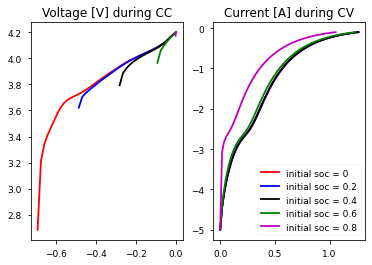

In [37]:
fig, ax = plt.subplots(1,2)

for sol in sols:
  cc = sol.cycles[0].steps[0]
  cv = sol.cycles[0].steps[1]
  t_cc = cc["Time [h]"].data
  t_cv = cv["Time [h]"].data
  ax[0].plot(t_cc-t_cv[0], cc["Terminal voltage [V]"].data)
  ax[0].set_title("Voltage [V] during CC")
  ax[1].plot(t_cv-t_cv[0], cv["Current [A]"].data)
  ax[1].set_title("Current [A] during CV")
  ax[1].legend([f"initial soc = {x}" for x in init_socs])